In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [63]:
df = pd.read_csv('../data/clean/training_dataset.csv') 
df2 = pd.read_csv('../data/clean/waiting_times_interpolated.csv')


In [64]:
df_meta = pd.read_csv('../data/overview data/metadata.csv', sep = ';', usecols=['DATE', 'DAYOFWEEK', 'DAYOFYEAR', 'WEEKOFYEAR', 'MONTHOFYEAR', 'YEAR', 'SEASON'])

In [65]:
df_meta.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON
0,1/01/2015,5,0,0,1,2015,CHRISTMAS PEAK
1,1/02/2015,6,1,0,1,2015,CHRISTMAS
2,1/03/2015,7,2,0,1,2015,CHRISTMAS
3,1/04/2015,1,3,1,1,2015,CHRISTMAS
4,1/05/2015,2,4,1,1,2015,CHRISTMAS


In [66]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATE         2079 non-null   object
 1   DAYOFWEEK    2079 non-null   int64 
 2   DAYOFYEAR    2079 non-null   int64 
 3   WEEKOFYEAR   2079 non-null   int64 
 4   MONTHOFYEAR  2079 non-null   int64 
 5   YEAR         2079 non-null   int64 
 6   SEASON       1826 non-null   object
dtypes: int64(5), object(2)
memory usage: 113.8+ KB


In [67]:
df.head()

,date,attraction,minute,actual_over_posted
0,2015-01-01,7_dwarfs_train,510,0.733333
1,2015-01-01,7_dwarfs_train,540,0.523810
2,2015-01-01,7_dwarfs_train,570,0.458333
3,2015-01-01,7_dwarfs_train,600,0.647059
4,2015-01-01,7_dwarfs_train,630,0.611111


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751616 entries, 0 to 1751615
Data columns (total 4 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   attraction          object 
 2   minute              int64  
 3   actual_over_posted  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 53.5+ MB


In [69]:
df2.head()

,Unnamed: 0,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted
0,0,2015-01-01,7_dwarfs_train,0,NaN,NaN,NaN,NaN
1,1,2015-01-01,7_dwarfs_train,30,NaN,NaN,NaN,NaN
2,2,2015-01-01,7_dwarfs_train,60,NaN,NaN,NaN,NaN
3,3,2015-01-01,7_dwarfs_train,90,NaN,NaN,NaN,NaN
4,4,2015-01-01,7_dwarfs_train,120,NaN,NaN,NaN,NaN


In [70]:
# Convert DATE column in df1 to datetime objects
df_meta['DATE'] = pd.to_datetime(df_meta['DATE'], format='%m/%d/%Y') #day/month/year format



In [71]:
df_meta.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON
0,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK
1,2015-01-02,6,1,0,1,2015,CHRISTMAS
2,2015-01-03,7,2,0,1,2015,CHRISTMAS
3,2015-01-04,1,3,1,1,2015,CHRISTMAS
4,2015-01-05,2,4,1,1,2015,CHRISTMAS


In [72]:
# Convert date column in df2 to datetime objects
df['date'] = pd.to_datetime(df['date']) #default format is year-month-day



In [73]:
df.head()

,date,attraction,minute,actual_over_posted
0,2015-01-01,7_dwarfs_train,510,0.733333
1,2015-01-01,7_dwarfs_train,540,0.523810
2,2015-01-01,7_dwarfs_train,570,0.458333
3,2015-01-01,7_dwarfs_train,600,0.647059
4,2015-01-01,7_dwarfs_train,630,0.611111


In [74]:
# Merge the DataFrames on the standardized date columns
merged_df = pd.merge(df_meta, df, left_on='DATE', right_on='date', how='inner')

In [75]:
merged_df.tail()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,date,attraction,minute,actual_over_posted
1495878,2021-08-31,3,242,35,8,2021,NaN,2021-08-31,winnie_the_pooh,1500,3.0
1495879,2021-08-31,3,242,35,8,2021,NaN,2021-08-31,winnie_the_pooh,1530,3.0
1495880,2021-08-31,3,242,35,8,2021,NaN,2021-08-31,winnie_the_pooh,1560,3.0
1495881,2021-08-31,3,242,35,8,2021,NaN,2021-08-31,winnie_the_pooh,1590,3.0
1495882,2021-08-31,3,242,35,8,2021,NaN,2021-08-31,winnie_the_pooh,1620,3.0


In [76]:
merged_df.to_csv('../data/clean/training_merged_metadata.csv', encoding='utf-8')

In [77]:
merged_df.isna().sum()

DATE                       0
DAYOFWEEK                  0
DAYOFYEAR                  0
WEEKOFYEAR                 0
MONTHOFYEAR                0
YEAR                       0
SEASON                221556
date                       0
attraction                 0
minute                     0
actual_over_posted         0
dtype: int64

In [78]:
merged_noseason = merged_df.drop(columns=['SEASON', 'date'])

In [79]:
merged_noseason.isna().sum()

DATE                  0
DAYOFWEEK             0
DAYOFYEAR             0
WEEKOFYEAR            0
MONTHOFYEAR           0
YEAR                  0
attraction            0
minute                0
actual_over_posted    0
dtype: int64

In [80]:
merged_noseason.describe()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,minute,actual_over_posted
count,1495883,1.495883e+06,1.495883e+06,1.495883e+06,1.495883e+06,1.495883e+06,1.495883e+06,1.495883e+06
mean,2018-01-30 13:25:55.959390720,4.004917e+00,1.853825e+02,2.658917e+01,6.631878e+00,2.017574e+03,1.136093e+03,inf
min,2015-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.015000e+03,1.800000e+02,0.000000e+00
25%,2016-07-10 00:00:00,2.000000e+00,9.500000e+01,1.400000e+01,4.000000e+00,2.016000e+03,9.000000e+02,4.285714e-01
50%,2018-01-24 00:00:00,4.000000e+00,1.870000e+02,2.700000e+01,7.000000e+00,2.018000e+03,1.140000e+03,7.368421e-01
75%,2019-06-11 00:00:00,6.000000e+00,2.770000e+02,4.000000e+01,1.000000e+01,2.019000e+03,1.410000e+03,1.250000e+00
max,2021-08-31 00:00:00,7.000000e+00,3.650000e+02,5.300000e+01,1.200000e+01,2.021000e+03,1.620000e+03,inf
std,NaN,2.025839e+00,1.061223e+02,1.517028e+01,3.467933e+00,1.802704e+00,3.033868e+02,NaN


<Axes: >

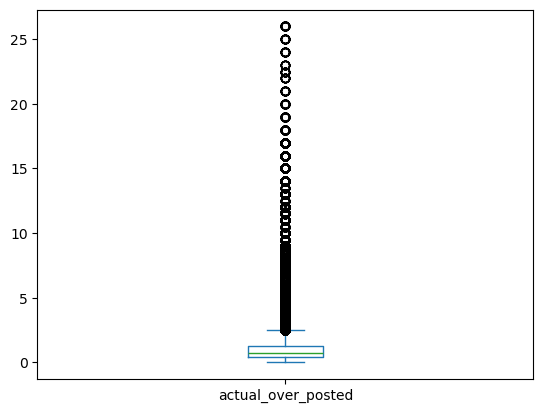

In [81]:
merged_noseason['actual_over_posted'].plot(kind='box')

In [82]:
merged_noseason_copy = merged_noseason.copy()

In [83]:
merged_noseason_copy['actual_over_posted'].replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\isabe\AppData\Local\Temp\ipykernel_26444\4213961315.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_noseason_copy['actual_over_posted'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [84]:
merged_noseason_copy.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,attraction,minute,actual_over_posted
0,2015-01-01,5,0,0,1,2015,7_dwarfs_train,510,0.733333
1,2015-01-01,5,0,0,1,2015,7_dwarfs_train,540,0.523810
2,2015-01-01,5,0,0,1,2015,7_dwarfs_train,570,0.458333
3,2015-01-01,5,0,0,1,2015,7_dwarfs_train,600,0.647059
4,2015-01-01,5,0,0,1,2015,7_dwarfs_train,630,0.611111


In [85]:
merged_noseason_copy.describe()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,minute,actual_over_posted
count,1495883,1.495883e+06,1.495883e+06,1.495883e+06,1.495883e+06,1.495883e+06,1.495883e+06,1.489501e+06
mean,2018-01-30 13:25:55.959390720,4.004917e+00,1.853825e+02,2.658917e+01,6.631878e+00,2.017574e+03,1.136093e+03,1.171522e+00
min,2015-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.015000e+03,1.800000e+02,0.000000e+00
25%,2016-07-10 00:00:00,2.000000e+00,9.500000e+01,1.400000e+01,4.000000e+00,2.016000e+03,9.000000e+02,4.285714e-01
50%,2018-01-24 00:00:00,4.000000e+00,1.870000e+02,2.700000e+01,7.000000e+00,2.018000e+03,1.140000e+03,7.272727e-01
75%,2019-06-11 00:00:00,6.000000e+00,2.770000e+02,4.000000e+01,1.000000e+01,2.019000e+03,1.410000e+03,1.250000e+00
max,2021-08-31 00:00:00,7.000000e+00,3.650000e+02,5.300000e+01,1.200000e+01,2.021000e+03,1.620000e+03,2.600000e+01
std,NaN,2.025839e+00,1.061223e+02,1.517028e+01,3.467933e+00,1.802704e+00,3.033868e+02,1.491509e+00


<Axes: >

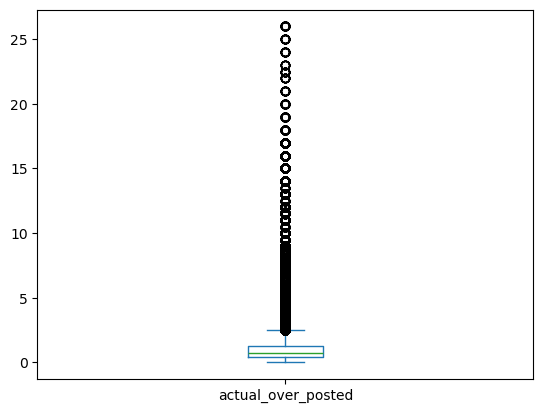

In [86]:
merged_noseason_copy['actual_over_posted'].plot(kind='box')

In [87]:
df_7dwarfs = merged_noseason_copy[merged_noseason_copy['attraction'] == '7_dwarfs_train']

In [88]:
df_7dwarfs.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,attraction,minute,actual_over_posted
0,2015-01-01,5,0,0,1,2015,7_dwarfs_train,510,0.733333
1,2015-01-01,5,0,0,1,2015,7_dwarfs_train,540,0.523810
2,2015-01-01,5,0,0,1,2015,7_dwarfs_train,570,0.458333
3,2015-01-01,5,0,0,1,2015,7_dwarfs_train,600,0.647059
4,2015-01-01,5,0,0,1,2015,7_dwarfs_train,630,0.611111


In [89]:
df_7dwarfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56809 entries, 0 to 1495146
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                56809 non-null  datetime64[ns]
 1   DAYOFWEEK           56809 non-null  int64         
 2   DAYOFYEAR           56809 non-null  int64         
 3   WEEKOFYEAR          56809 non-null  int64         
 4   MONTHOFYEAR         56809 non-null  int64         
 5   YEAR                56809 non-null  int64         
 6   attraction          56809 non-null  object        
 7   minute              56809 non-null  int64         
 8   actual_over_posted  56809 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 4.3+ MB


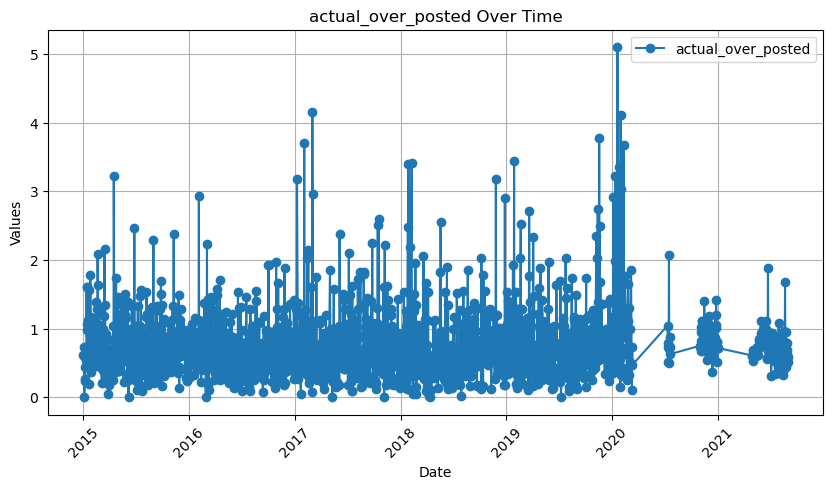

In [90]:

# Group by date and aggregate (e.g., mean, sum, etc.)
grouped_df = df_7dwarfs.groupby('DATE')[['actual_over_posted']].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(grouped_df.index, grouped_df['actual_over_posted'], label='actual_over_posted', marker='o')


# Formatting
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('actual_over_posted Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)

plt.show()

In [91]:
df_7dwarfs_no_covid = df_7dwarfs[df_7dwarfs['DATE'].dt.year != 2020]

In [92]:
df_7dwarfs_no_covid.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,attraction,minute,actual_over_posted
0,2015-01-01,5,0,0,1,2015,7_dwarfs_train,510,0.733333
1,2015-01-01,5,0,0,1,2015,7_dwarfs_train,540,0.523810
2,2015-01-01,5,0,0,1,2015,7_dwarfs_train,570,0.458333
3,2015-01-01,5,0,0,1,2015,7_dwarfs_train,600,0.647059
4,2015-01-01,5,0,0,1,2015,7_dwarfs_train,630,0.611111


In [94]:
df_7dwarfs_no_covid.describe()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,minute,actual_over_posted
count,52979,52979.000000,52979.000000,52979.000000,52979.000000,52979.000000,52979.000000,52979.000000
mean,2017-09-23 01:19:04.098605056,4.091281,185.250042,26.576908,6.628400,2017.219540,1113.356802,0.726760
min,2015-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,2015.000000,240.000000,0.000000
25%,2016-03-30 00:00:00,2.000000,98.000000,14.000000,4.000000,2016.000000,840.000000,0.357143
50%,2017-08-23 00:00:00,4.000000,187.000000,27.000000,7.000000,2017.000000,1140.000000,0.600000
75%,2018-12-29 00:00:00,6.000000,273.000000,39.000000,10.000000,2018.000000,1380.000000,0.875000
max,2021-08-31 00:00:00,7.000000,365.000000,53.000000,12.000000,2021.000000,1620.000000,12.000000
std,NaN,2.019949,103.742921,14.834723,3.388526,1.727148,320.576272,0.657446


In [98]:

X = df_7dwarfs_no_covid.drop(columns=['actual_over_posted', 'attraction', 'DATE'])  # Features
y = df_7dwarfs_no_covid['actual_over_posted']  # Target variable (numeric)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [99]:
X


,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,minute
0,5,0,0,1,2015,510
1,5,0,0,1,2015,540
2,5,0,0,1,2015,570
3,5,0,0,1,2015,600
4,5,0,0,1,2015,630
...,...,...,...,...,...,...
1495142,3,242,35,8,2021,1500
1495143,3,242,35,8,2021,1530
1495144,3,242,35,8,2021,1560
1495145,3,242,35,8,2021,1590


In [100]:
model = RandomForestRegressor(n_estimators=50, max_samples=0.5, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=0.5, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

MAE: 0.2016
RMSE: 0.3339


mean is 0.72, met sdtev 0.65. Het model was beter met minder features.

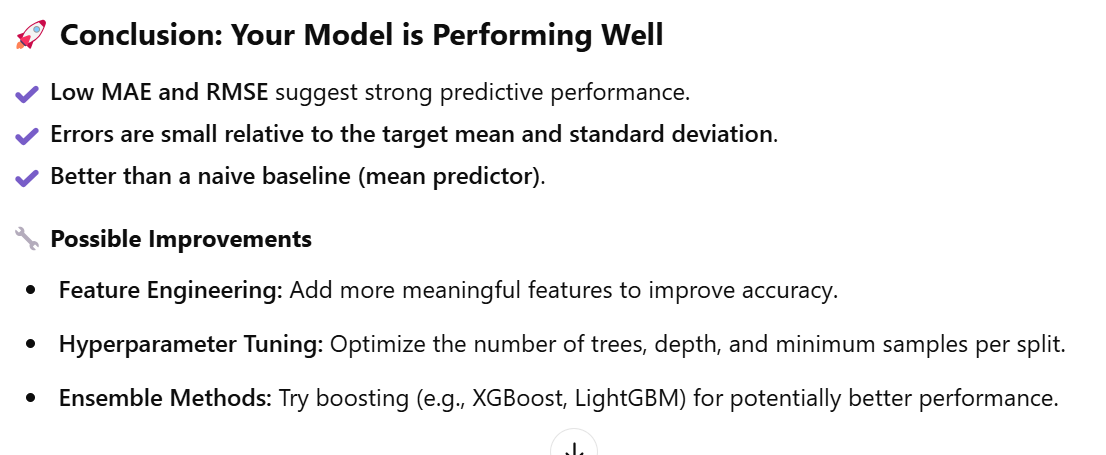

In [103]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model2.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [104]:
y_pred = model2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

MAE: 0.1483
RMSE: 0.2613


In [105]:
model3 = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [106]:
y_pred = model3.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

MAE: 0.1482
RMSE: 0.2603


Conclusie: het verschil tussen 100 of 200 random trees is klein. Heeft geen zin om het bos nog groter te maken.